In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('seaborn-dark')

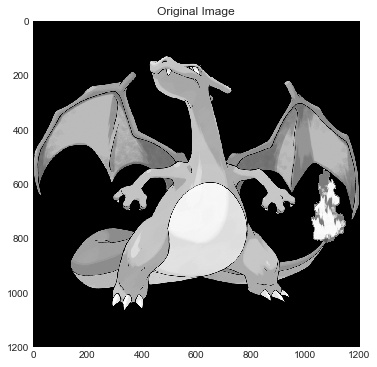

In [430]:
img = plt.imread('doggo.png')
img = img[:,:700,1]
img = 1-plt.imread('charizard.png')[:,:,1]

plt.figure(figsize=(6,6))
plt.title('Original Image')
plt.imshow(img)

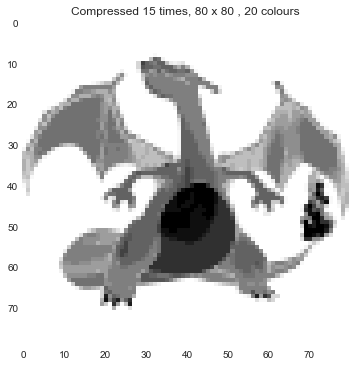

In [468]:
#x is the compression factor, x*x pixels will shrink into one square
x = 15
#k is the number of colours
k= 20

n = img.shape[0]//x
m = img.shape[1]//x
pix = np.zeros([n,m])
for i in range(n):
    for j in range(m):
        pix[i][j] = int(round(np.mean(img[x*i:x*i+(x-1),x*j:x*j+(x-1)])*k,0))
        
plt.figure(figsize=(6,6))
plt.imshow(-1*pix)
plt.title('Compressed {} times, {} x {} , {} colours'.format(x,n,m,k))
plt.show()

In [469]:
#k value is k+1
def create_blocks(v,k, size, strength=15, contrast=0.2):
    block = np.zeros([size,size])
    if v == 0:
        return block
    for i in range(size):
        for j in range(size):
            block[i][j] = max(min(np.random.normal(v/(k+(k-strength)), contrast),1),0)
    return np.round(block,0)
        

In [483]:
(n,m) = pix.shape
size = 5
original = k-pix
new_img = np.zeros([size*n,size*m])
for i in range(n):
    for j in range(m):
        new_img[i*size:(i+1)*size,j*size:(j+1)*size] = create_blocks(original[i][j],k+1, size, strength=10, contrast=0.2)



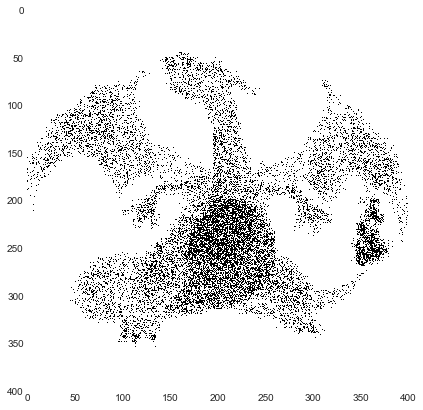

In [484]:
plt.figure(figsize=[7,7])
plt.imshow(new_img)